In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

  !ls

In [1]:
import re
import numpy as np
import pandas as pd

df = pd.read_csv('BBB_features.csv', sep=';')
label = pd.read_csv('BBB_labels.txt', header=None, sep=' ')
logbb = []
classes = []
for molname in df['Objects']:
    basename = re.sub(r'_c\d+', '', molname)
    if basename in label[0].values:
        logBB = label[label[0] == basename][1].values[0]
        logbb.append(logBB)
        if logBB > 0:
            classes.append(1)
        else:
            classes.append(0)
    else:
        print('removing', molname)

df['logBB'] = logbb
df['Class'] = classes

print('logBB', len(logbb))
print('classes', len(classes))
print(df.shape)
print(df.head())

logBB 3608
classes 3608
(3608, 130)
                        Objects        V        S        R        G         d  \
0  1,1,1,2-tetrachloroethane_c0  327.875  248.402  1.31994  1.12279  0.511927   
1  1,1,1,2-tetrachloroethane_c1  327.750  249.588  1.31316  1.13127  0.512122   
2  1,1,1,2-tetrachloroethane_c2  327.625  241.829  1.35478  1.07934  0.512318   
3  1,1,1,2-tetrachloroethane_c3  326.250  243.898  1.33765  1.09783  0.514477   
4  1,1,1,2-tetrachloroethane_c4  327.625  244.183  1.34172  1.09514  0.512318   

        W1       W2     W3   W4  ...   P5    EMDIF    EMDIS  Sdry/S  Spol/S  \
0  560.000  163.875  4.875  0.0  ...  0.0  3.11199  2.80238     1.0     0.0   
1  561.875  163.500  4.750  0.0  ...  0.0  3.11199  2.80274     1.0     0.0   
2  550.625  162.375  4.375  0.0  ...  0.0  3.11199  2.80524     1.0     0.0   
3  550.750  163.375  4.500  0.0  ...  0.0  3.11199  2.80523     1.0     0.0   
4  551.375  163.000  4.500  0.0  ...  0.0  3.11199  2.80289     1.0     0.0   

  

In [2]:
X = df
print('                          Initial X.shape', X.shape)
# remove columns with NaN
X = X.dropna(axis=1)    
print('      After removing NaN columns, X.shape', X.shape)
# remove constant columns
X = X.loc[:, (X != X.iloc[0]).any()]
print(' After removing constant columns, X.shape', X.shape)
# remove duplicate columns
X = X.T.drop_duplicates().T
print('After removing duplicate columns, X.shape', X.shape)
y_regression = np.array(df['logBB'])
X.drop(['logBB'], axis=1, inplace=True)
permeate = df['Class'].tolist()
X.drop(['Class'], axis=1, inplace=True)
y_classification = np.array(permeate)
# trry also to use categorical
print()
print('X.shape', X.shape)
print('y_regression.shape', y_regression.shape)
print('y_classification.shape', y_classification.shape)

print(X.info())
# print each X column everage and std deviation
print()
print('X columns average and std deviation:')
for col in X.columns:
    if col != 'Objects':
        print(f'{col}: avg={X[col].mean():.4f}, std={X[col].std():.4f}')


                          Initial X.shape (3608, 130)
      After removing NaN columns, X.shape (3608, 127)
 After removing constant columns, X.shape (3608, 125)
After removing duplicate columns, X.shape (3608, 125)

X.shape (3608, 123)
y_regression.shape (3608,)
y_classification.shape (3608,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3608 entries, 0 to 3607
Columns: 123 entries, Objects to PAINS
dtypes: object(123)
memory usage: 3.4+ MB
None

X columns average and std deviation:
V: avg=552.4429, std=202.2248
S: avg=387.4471, std=121.9283
R: avg=1.4011, std=0.0904
G: avg=1.2978, std=0.1389
d: avg=0.4125, std=0.0847
W1: avg=908.5674, std=304.8175
W2: avg=513.3480, std=247.8358
W3: avg=266.3081, std=161.3544
W4: avg=108.4644, std=75.0177
W5: avg=50.5712, std=40.3504
W6: avg=21.2528, std=20.4407
W7: avg=6.9407, std=9.1792
W8: avg=1.4158, std=3.0600
D1: avg=202.6513, std=94.3741
D2: avg=86.4462, std=49.6445
D3: avg=33.9245, std=22.8631
D4: avg=18.3450, std=14.5966
D5: avg=11.4640, 

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_regression_train_val, \
    y_regression_test, y_classification_train_val, \
    y_classification_test = \
    train_test_split(X, y_regression, y_classification, \
                     test_size=0.2, random_state=42)
X_train, X_val, y_regression_train, \
    y_regression_val, y_classification_train, \
    y_classification_val = \
    train_test_split(X_train_val, y_regression_train_val, \
                     y_classification_train_val, \
                     test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2
print('X_train.shape', X_train.shape)
print('y_regression_train.shape', y_regression_train.shape)
print('y_classification_train.shape', y_classification_train.shape)
print('X_val.shape', X_val.shape)
print('y_regression_val.shape', y_regression_val.shape)
print('y_classification_val.shape', y_classification_val.shape)
print('X_test.shape', X_test.shape)
print('y_regression_test.shape', y_regression_test.shape)
print('y_classification_test.shape', y_classification_test.shape)

X_train.shape (2164, 123)
y_regression_train.shape (2164,)
y_classification_train.shape (2164,)
X_val.shape (722, 123)
y_regression_val.shape (722,)
y_classification_val.shape (722,)
X_test.shape (722, 123)
y_regression_test.shape (722,)
y_classification_test.shape (722,)


In [4]:
# Scale the data using StandardScaler
from sklearn.preprocessing import StandardScaler
Xscaler = StandardScaler()
X_train_scaled = Xscaler.fit_transform(X_train.drop(['Objects'], axis=1))
X_val_scaled = Xscaler.transform(X_val.drop(['Objects'], axis=1))
X_test_scaled = Xscaler.transform(X_test.drop(['Objects'], axis=1))
Yscaler = StandardScaler()
y_regression_train_scaled = Yscaler.fit_transform(y_regression_train.reshape(-1, 1)).flatten()
y_regression_val_scaled = Yscaler.transform(y_regression_val.reshape(-1, 1)).flatten()
y_regression_test_scaled = Yscaler.transform(y_regression_test.reshape(-1, 1)).flatten()

In [5]:
import timeit
from keras.models import Sequential
from keras.layers import Dense, InputLayer, Dropout
from keras.optimizers import Adam
from keras.regularizers import l2
adam = Adam(learning_rate=0.001)
from sklearn.preprocessing import StandardScaler

# convert all X values to floating point
X_train_np = X_train_scaled
X_test_np = X_test_scaled
X_val_np = X_val_scaled

start = timeit.default_timer()

model = Sequential()
model.add(InputLayer(input_shape=(X_train_np.shape[1],)))
model.add(Dense(32, activation='relu'))
# TRY TO REMOVE SOME LAYERS OR NEURONS
model.add(Dense(64, activation='relu'))
# Try to add l2 regularization
# model.add(Dense(64, activation='relu', kernel_regularizer='l2'))
model.add(Dense(32, activation='relu'))
#model.add(Dropout(0.5))  # Dropout layer with a 50% dropout rate
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', \
            optimizer=adam, \
            metrics=['mse'])

history = model.fit(X_train_np, y_regression_train_scaled, epochs=20, \
                    batch_size=64, verbose=1, \
                    validation_data=(X_val_np, y_regression_val_scaled))
endtrain = timeit.default_timer()
print('Time train %8.3f s'%(endtrain - start))

2025-11-09 16:00:11.921155: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-09 16:00:11.979955: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/20


/home/redo/anaconda3/envs/tf_gpu_env/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4659 - mse: 0.4659 - val_loss: 0.2803 - val_mse: 0.2803
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2299 - mse: 0.2299 - val_loss: 0.1691 - val_mse: 0.1691
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1532 - mse: 0.1532 - val_loss: 0.1253 - val_mse: 0.1253
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1176 - mse: 0.1176 - val_loss: 0.0989 - val_mse: 0.0989
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0926 - mse: 0.0926 - val_loss: 0.0865 - val_mse: 0.0865
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0717 - mse: 0.0717 - val_loss: 0.0712 - val_mse: 0.0712
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0608 - mse: 0.0608 - val_loss: 0.0634 - val_mse: 0.0634
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0505 - mse: 0.0505 - val_loss: 0.0584 - val_mse: 0.0584
Epoch 9/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0448 - mse: 0.0448 - va

min loss:  0.017908426001667976
min val_loss:  0.028260305523872375


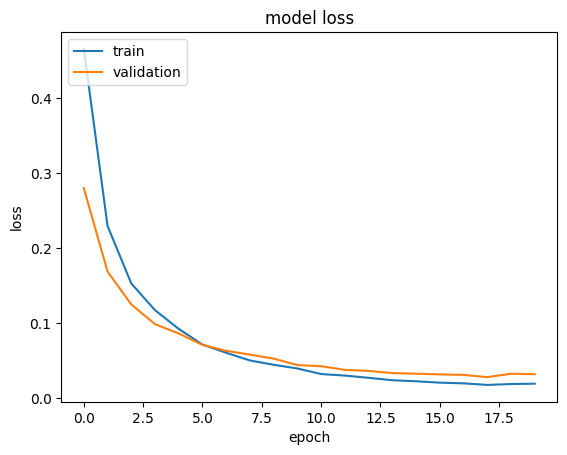

In [6]:
import matplotlib.pyplot as plt

print("min loss: ", min(history.history['loss']))
print("min val_loss: ", min(history.history['val_loss']))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Test_rmse:  0.1451720624134261
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Train_rmse:  0.10998728750512657
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Validation_rmse:  0.12758026815325604


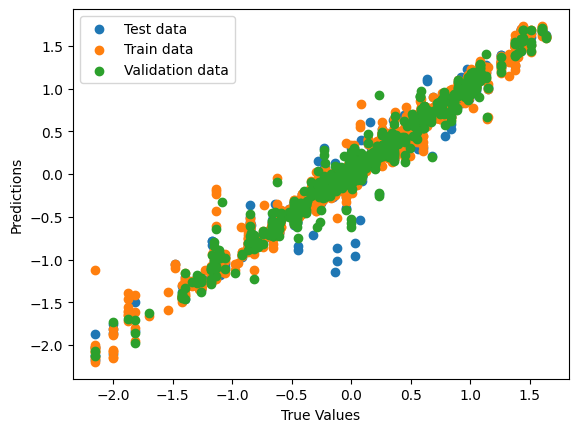

In [7]:
Y_pred_test = model.predict(X_test_np)
Y_pred_test = Yscaler.inverse_transform(Y_pred_test).flatten()
test_rmse = np.sqrt(mean_squared_error(y_regression_test, Y_pred_test))
print('Test_rmse: ', test_rmse)
Y_pred_train = model.predict(X_train_np)
Y_pred_train = Yscaler.inverse_transform(Y_pred_train).flatten()
train_rmse = np.sqrt(mean_squared_error(y_regression_train, Y_pred_train))
print('Train_rmse: ', train_rmse)
Y_pred_val = model.predict(X_val_np)
Y_pred_val = Yscaler.inverse_transform(Y_pred_val).flatten()
val_rmse = np.sqrt(mean_squared_error(y_regression_val, Y_pred_val))
print('Validation_rmse: ', val_rmse)
plt.figure()
plt.scatter(y_regression_test, Y_pred_test, label='Test data')
plt.scatter(y_regression_train, Y_pred_train, label='Train data')
plt.scatter(y_regression_val, Y_pred_val, label='Validation data')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.show()